In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#

In [193]:
df=pd.read_csv('/content/stud.csv')

In [194]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **Exploring types of Features **

In [195]:
for i in df.columns:
  print(i)
  print(df[i].unique())

gender
['female' 'male']
race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch
['standard' 'free/reduced']
test_preparation_course
['none' 'completed']
math_score
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading_score
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing_score
[ 74  88  93  44  75  78  92 

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [197]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [198]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# **Observations:**
1. **Lunch , Test prep , Gender can be made for Label Encoder as they can be classified in binary manner**
2.  **on parental_level_of_education featutre we can perform
   better analysis for possible merging of class**


# **Feature Extraction**

In [199]:
df['Total_Score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average_Score']=df['Total_Score']/3
df.drop(['math_score','reading_score','writing_score'],axis=1,inplace=True)

# **Train Test Split **

In [200]:
X=df.drop(['Average_Score','Total_Score'],axis=1)
y=df['Average_Score']

In [201]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [202]:
y.head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: Average_Score, dtype: float64

# Categorical Features and Numerical Features


In [203]:
cat_features=X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns

In [204]:
for i in cat_features:
  print(i)
  print(X[i].unique())

gender
['female' 'male']
race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch
['standard' 'free/reduced']
test_preparation_course
['none' 'completed']


In [205]:
for i in num_features:
  print(i)
  print(X[i].unique())

# **Label Encoding**

In [206]:
label=LabelEncoder()
onehot=OneHotEncoder(sparse=False)

In [207]:
df['gender']=label.fit_transform(df['gender'])
df['test_preparation_course']=label.fit_transform(df['test_preparation_course'])
df['lunch']=label.fit_transform(df['lunch'])

In [208]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,Total_Score,Average_Score
0,0,group B,bachelor's degree,1,1,218,72.666667
1,0,group C,some college,1,0,247,82.333333
2,0,group B,master's degree,1,1,278,92.666667
3,1,group A,associate's degree,0,1,148,49.333333
4,1,group C,some college,1,1,229,76.333333


In [209]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [210]:
onehot_encoded=onehot.fit_transform(df[['race_ethnicity']])

In [211]:
race_ethnicity_updated=pd.DataFrame(onehot_encoded, columns=onehot.get_feature_names_out(['race_ethnicity']))

In [212]:
df = pd.concat([df.drop('race_ethnicity', axis=1), race_ethnicity_updated], axis=1)

In [213]:
df.head()

,gender,parental_level_of_education,lunch,test_preparation_course,Total_Score,Average_Score,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E
0,0,bachelor's degree,1,1,218,72.666667,0.0,1.0,0.0,0.0,0.0
1,0,some college,1,0,247,82.333333,0.0,0.0,1.0,0.0,0.0
2,0,master's degree,1,1,278,92.666667,0.0,1.0,0.0,0.0,0.0
3,1,associate's degree,0,1,148,49.333333,1.0,0.0,0.0,0.0,0.0
4,1,some college,1,1,229,76.333333,0.0,0.0,1.0,0.0,0.0


In [214]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

# Labeling  
'some high school'--->'high school'

'some college'--------->"associate's degree"

In [215]:
for data in df['parental_level_of_education']:
  if data=='some high school':
    df['parental_level_of_education']=df['parental_level_of_education'].replace('some high school','high school')
  if data=='some college':
    df['parental_level_of_education']=df['parental_level_of_education'].replace('some college',"associate's degree")

In [216]:
df.head()

,gender,parental_level_of_education,lunch,test_preparation_course,Total_Score,Average_Score,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E
0,0,bachelor's degree,1,1,218,72.666667,0.0,1.0,0.0,0.0,0.0
1,0,associate's degree,1,0,247,82.333333,0.0,0.0,1.0,0.0,0.0
2,0,master's degree,1,1,278,92.666667,0.0,1.0,0.0,0.0,0.0
3,1,associate's degree,0,1,148,49.333333,1.0,0.0,0.0,0.0,0.0
4,1,associate's degree,1,1,229,76.333333,0.0,0.0,1.0,0.0,0.0


In [217]:
onehot_encoded=onehot.fit_transform(df[['parental_level_of_education']])

In [218]:
parental=pd.DataFrame(onehot_encoded, columns=onehot.get_feature_names_out(['parental_level_of_education']))

In [219]:
df = pd.concat([df.drop('parental_level_of_education', axis=1), parental], axis=1)

In [220]:
df.head()

,gender,lunch,test_preparation_course,Total_Score,Average_Score,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree
0,0,1,1,218,72.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1,0,247,82.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,1,1,278,92.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,1,148,49.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,1,1,229,76.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


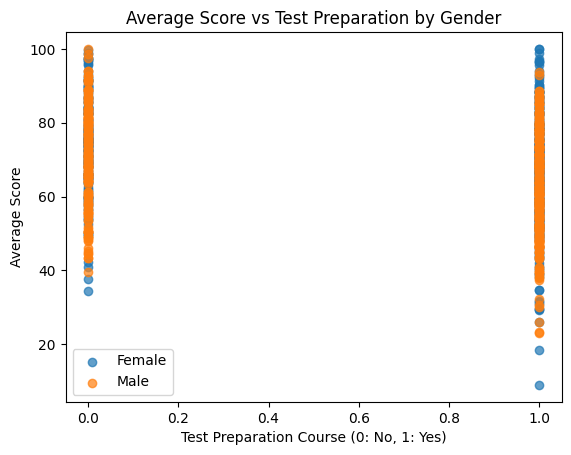

In [221]:
# @title Average Score vs Test Preparation by Gender

import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(df[df['gender'] == 0]['test_preparation_course'], df[df['gender'] == 0]['Average_Score'], label='Female', alpha=0.7)
plt.scatter(df[df['gender'] == 1]['test_preparation_course'], df[df['gender'] == 1]['Average_Score'], label='Male', alpha=0.7)

plt.xlabel('Test Preparation Course (0: No, 1: Yes)')
plt.ylabel('Average Score')
plt.title('Average Score vs Test Preparation by Gender')
_ = plt.legend()

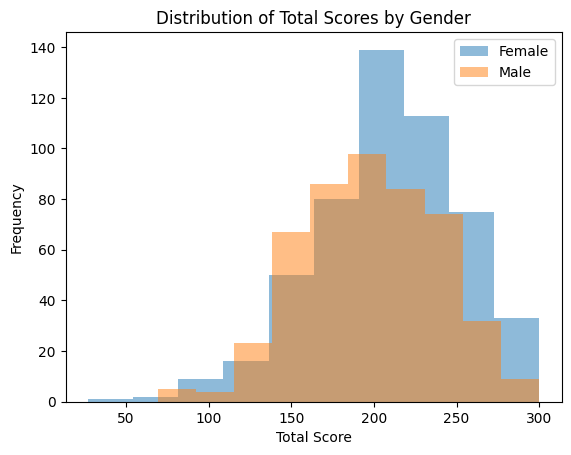

In [222]:
# @title Distribution of Total Scores by Gender

import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df[df['gender'] == 0]['Total_Score'], alpha=0.5, label='Female')
plt.hist(df[df['gender'] == 1]['Total_Score'], alpha=0.5, label='Male')

# Add labels and title
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Distribution of Total Scores by Gender')
_ = plt.legend()

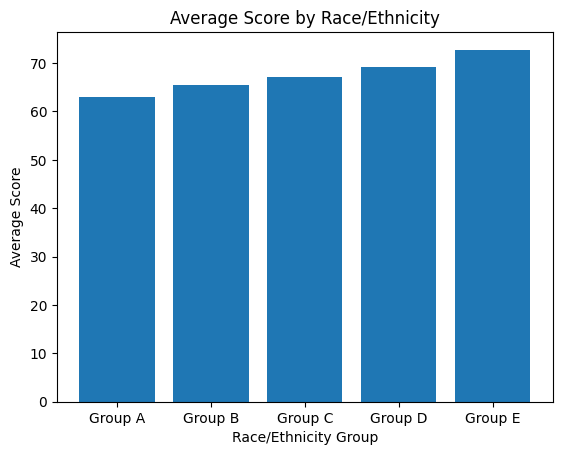

In [223]:
# @title Average Score by Race/Ethnicity

import matplotlib.pyplot as plt
import numpy as np

# Calculate average scores for each race/ethnicity group
group_a_avg = df[df['race_ethnicity_group A'] == 1]['Average_Score'].mean()
group_b_avg = df[df['race_ethnicity_group B'] == 1]['Average_Score'].mean()
group_c_avg = df[df['race_ethnicity_group C'] == 1]['Average_Score'].mean()
group_d_avg = df[df['race_ethnicity_group D'] == 1]['Average_Score'].mean()
group_e_avg = df[df['race_ethnicity_group E'] == 1]['Average_Score'].mean()

# Create bar chart
groups = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
avg_scores = [group_a_avg, group_b_avg, group_c_avg, group_d_avg, group_e_avg]

plt.bar(groups, avg_scores)
plt.xlabel('Race/Ethnicity Group')
plt.ylabel('Average Score')
_ = plt.title('Average Score by Race/Ethnicity')

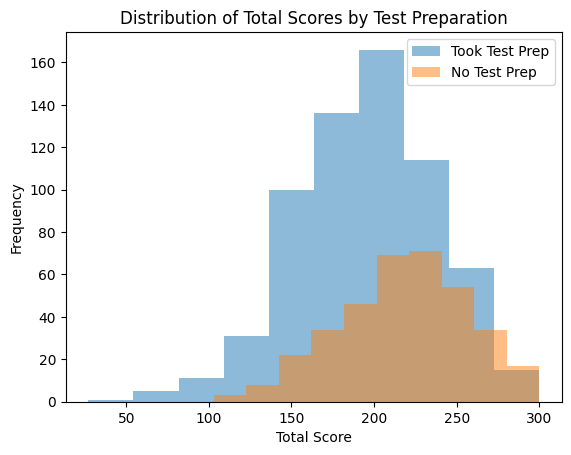

In [224]:
# @title Distribution of Total Scores by Test Preparation

import matplotlib.pyplot as plt

plt.hist(df[df['test_preparation_course'] == 1]['Total_Score'], alpha=0.5, label='Took Test Prep')
plt.hist(df[df['test_preparation_course'] == 0]['Total_Score'], alpha=0.5, label='No Test Prep')

plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.legend()
_ = plt.title('Distribution of Total Scores by Test Preparation')

<Axes: xlabel='Total_Score', ylabel='Count'>

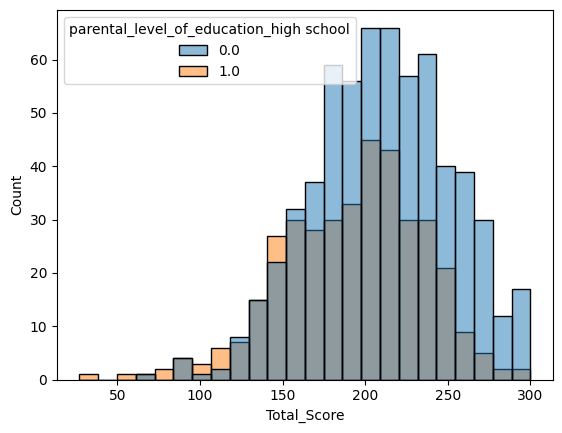

In [225]:
# prompt: Using dataframe df: total score by parental_level education

# Group by parental level of education and calculate the total score for each group.
df.groupby('parental_level_of_education_high school')['Total_Score'].sum()

# Distribution of Total Scores by 'parental_level_of_education_high school'
sns.histplot(data=df, x='Total_Score', hue='parental_level_of_education_high school')


<Axes: >

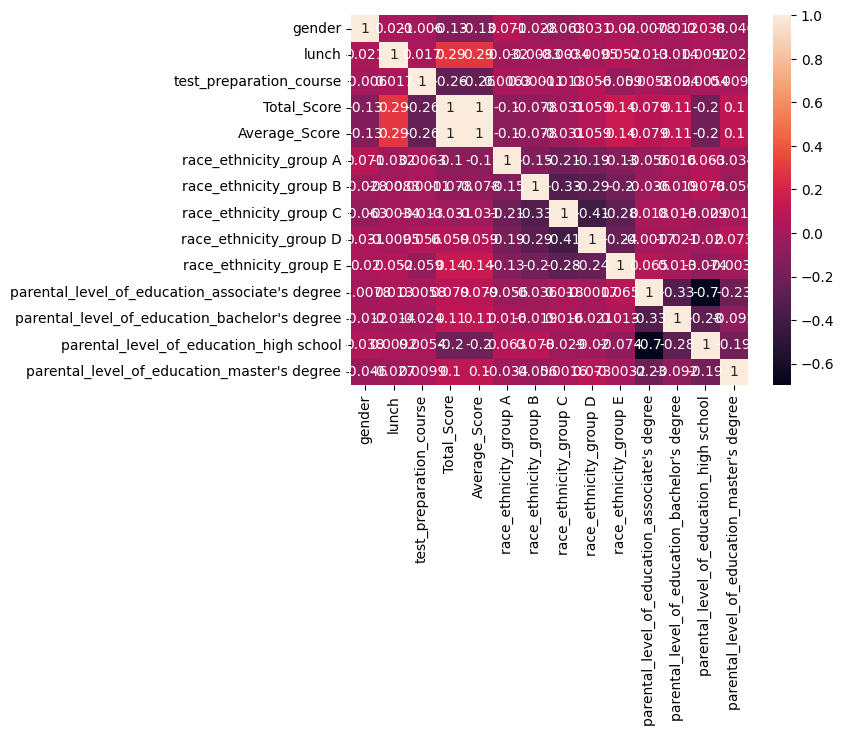

In [226]:
sns.heatmap(df.corr(), annot=True)
#

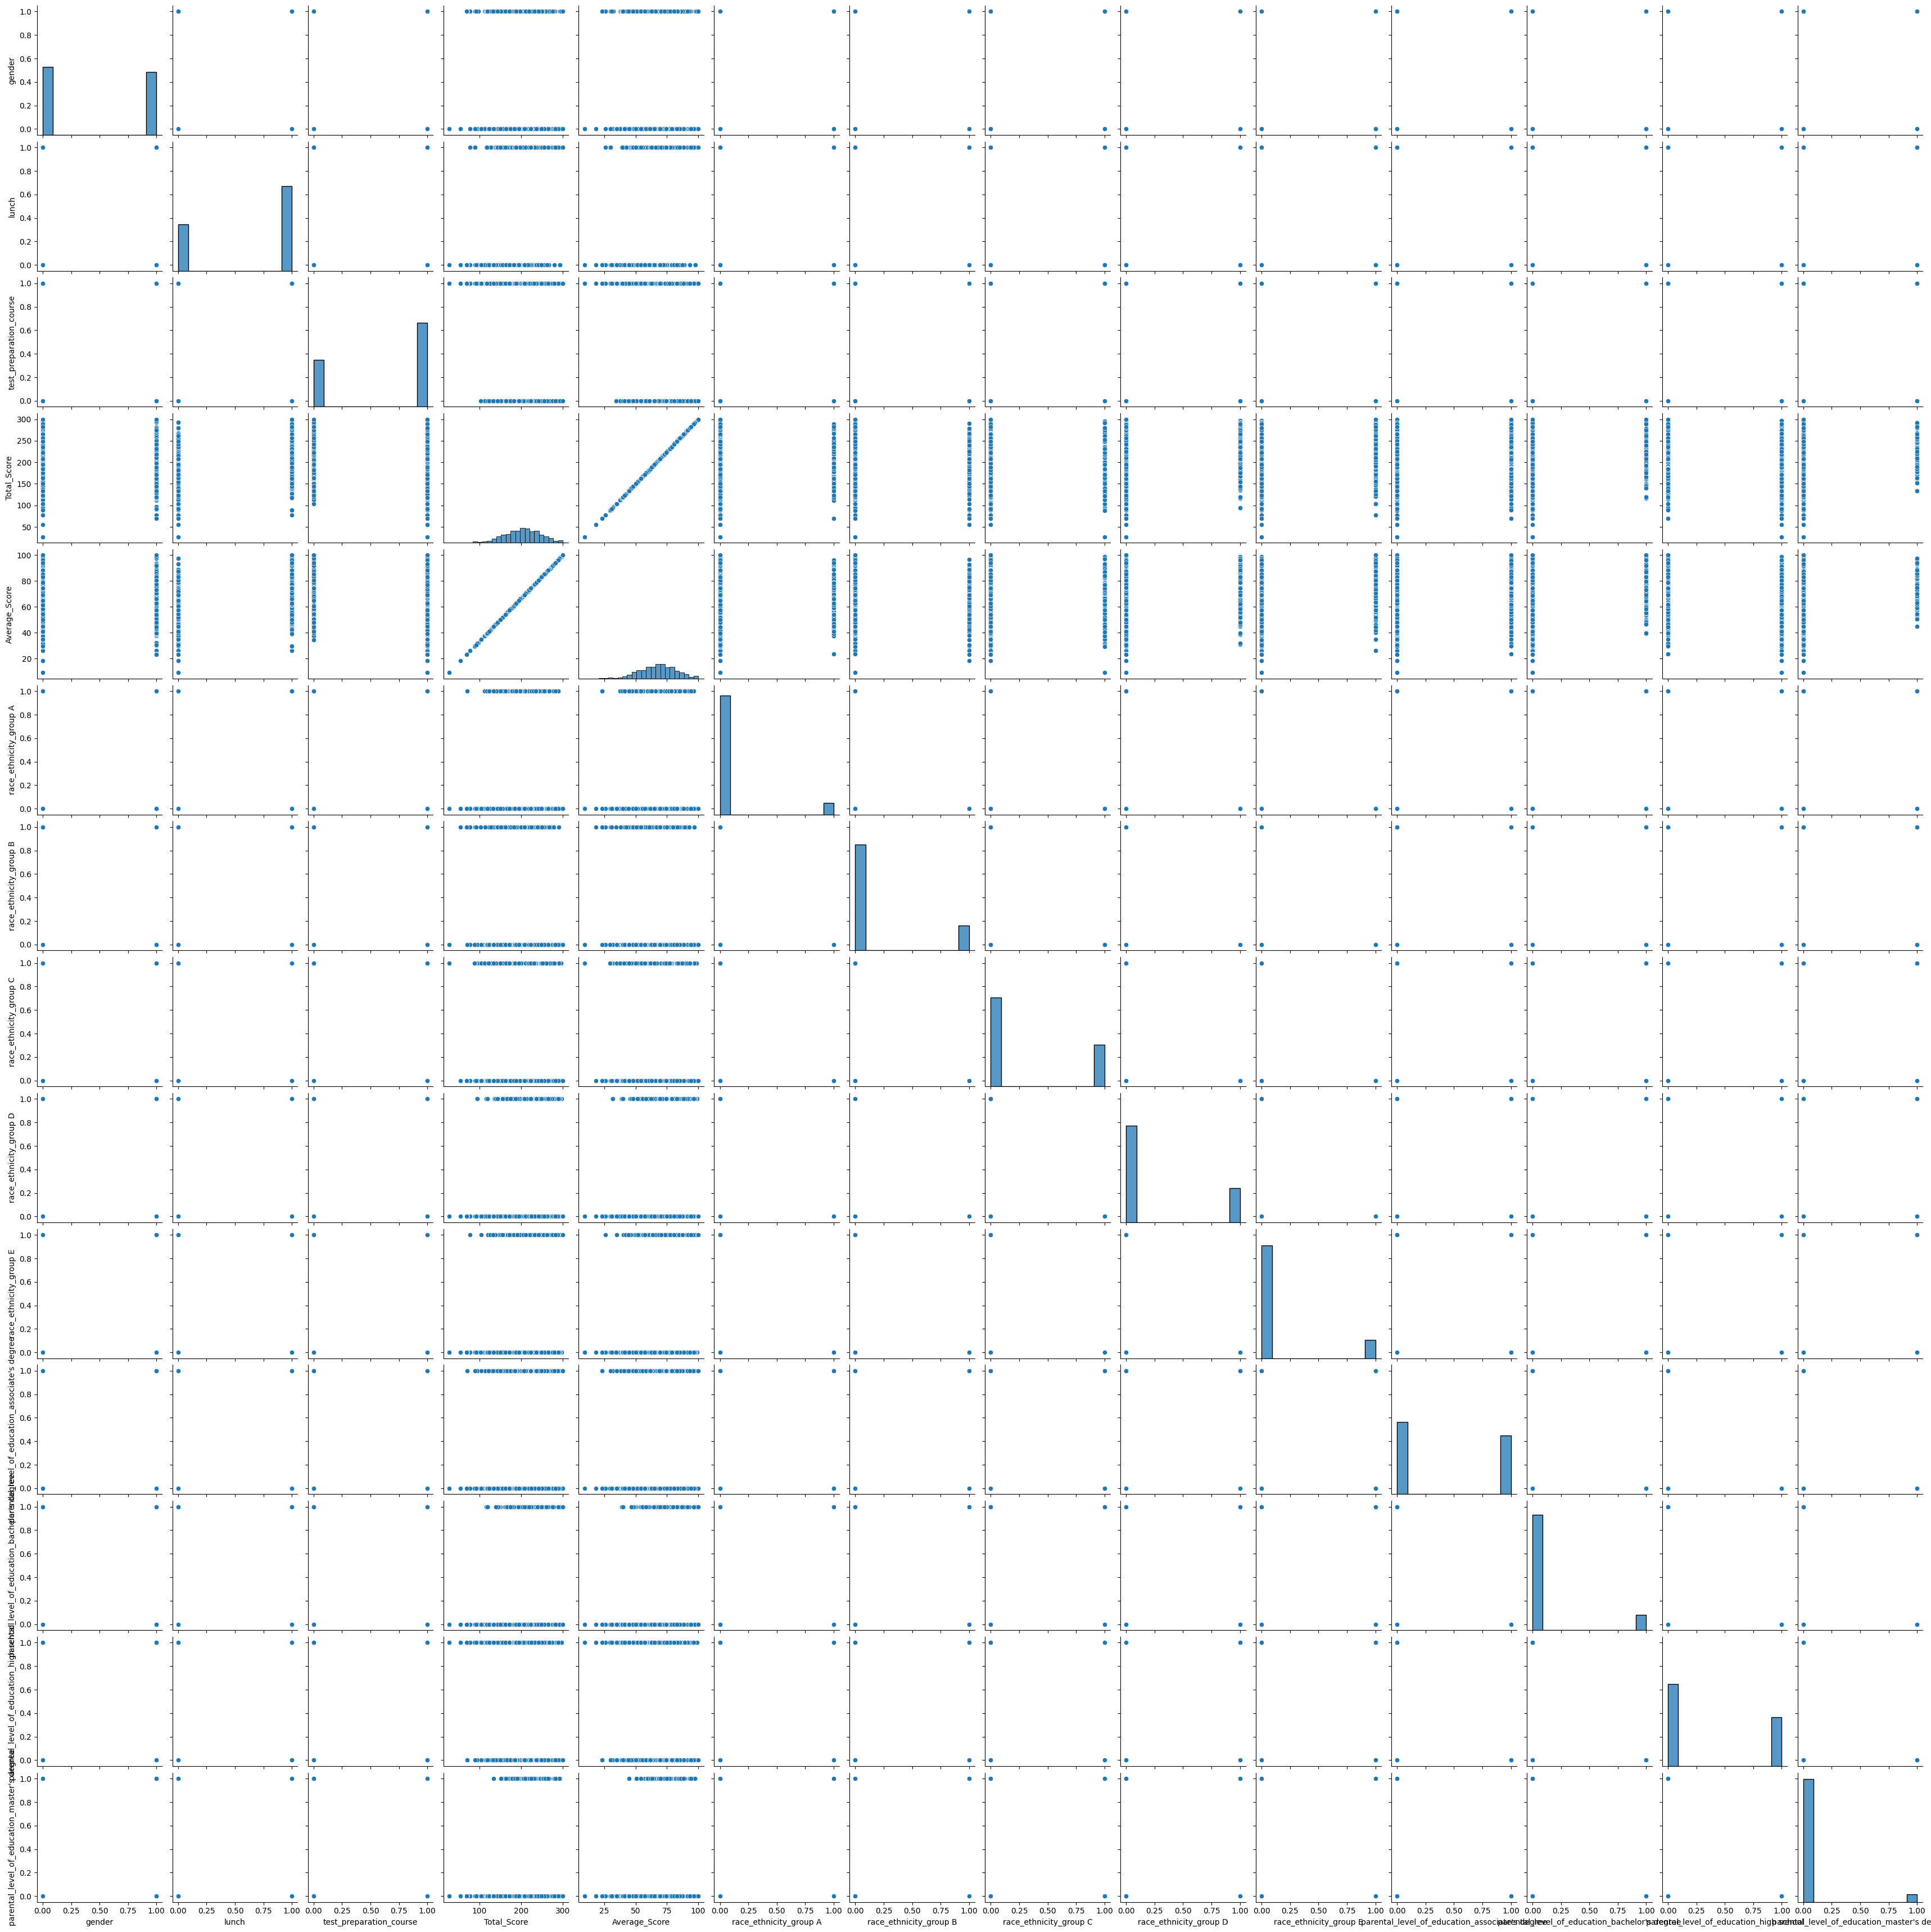

In [227]:
sns.pairplot(df)

In [229]:
X=df.drop(['Average_Score','Total_Score'],axis=1)
y=df['Average_Score']

<Axes: >

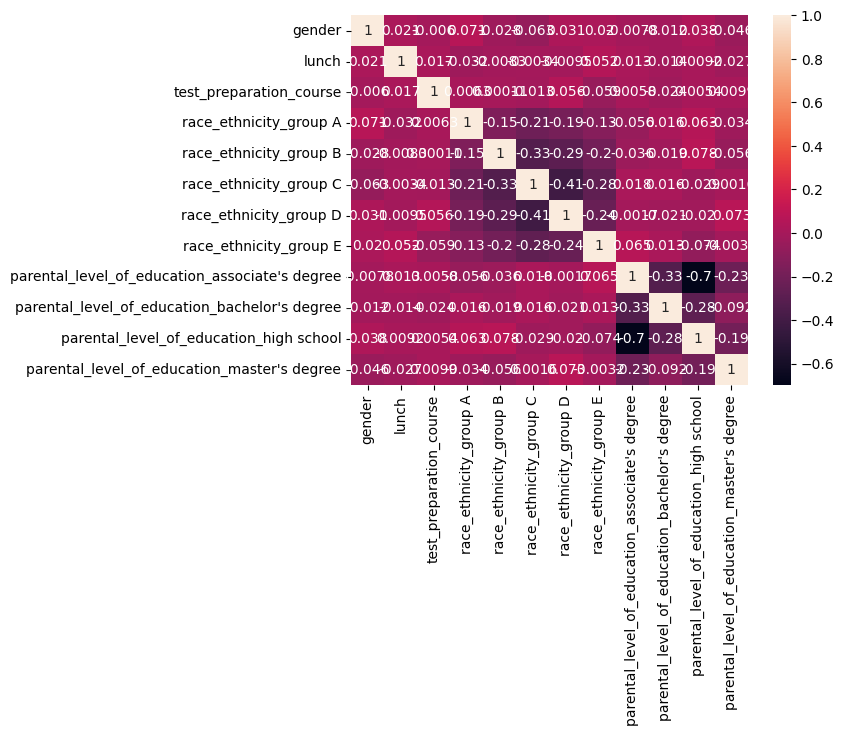

In [232]:
sns.heatmap(X.corr(), annot=True)